# Notebook Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Math


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit


import gvar as gv

#from utilities import plateau_search_symm

import itertools as it

import correlatoranalyser as CA

from moments_result import  dict_from_results_list, moment_final_result, systematic_final_result

In [2]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/2PointCorrelation/"


opAnalyzer1 = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_p0_q0",
                            operator_folder= "../operator_database",
                            momentum='PX0_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )


opAnalyzer2 = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_px-2_q0",
                            operator_folder= "../operator_database",
                            momentum='PX-2_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )

opAnalyzer_list = [opAnalyzer1, opAnalyzer2]


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



In [3]:
#we set the right parameters for the two classes
for opAnalyzer in opAnalyzer_list:

    opAnalyzer.set_resampling_type('jackknife')
    #opAnalyzer.set_resampling_type('bootstrap')
    #opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=False, resample_fit_correlated=False)
    opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=True, resample_fit_correlated=True)
    #opAnalyzer.remove_T(12)

    # #we take the operators of the paper


    opAnalyzer.focus_paper_operators(verbose=True)
    opAnalyzer.remove_zeroK_operators(verbose=True)

    opAnalyzer

    opAnalyzer.display_operators()


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assuming a non zero kinematical factor for each operator.



Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [0 0 0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 5
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10, 12]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife
Number of resamples: 212

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assuming a non zero kinematical factor for each operator.



Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [-2  0  0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 9
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10, 12]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife
Number of resamples: 212

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Combined plots

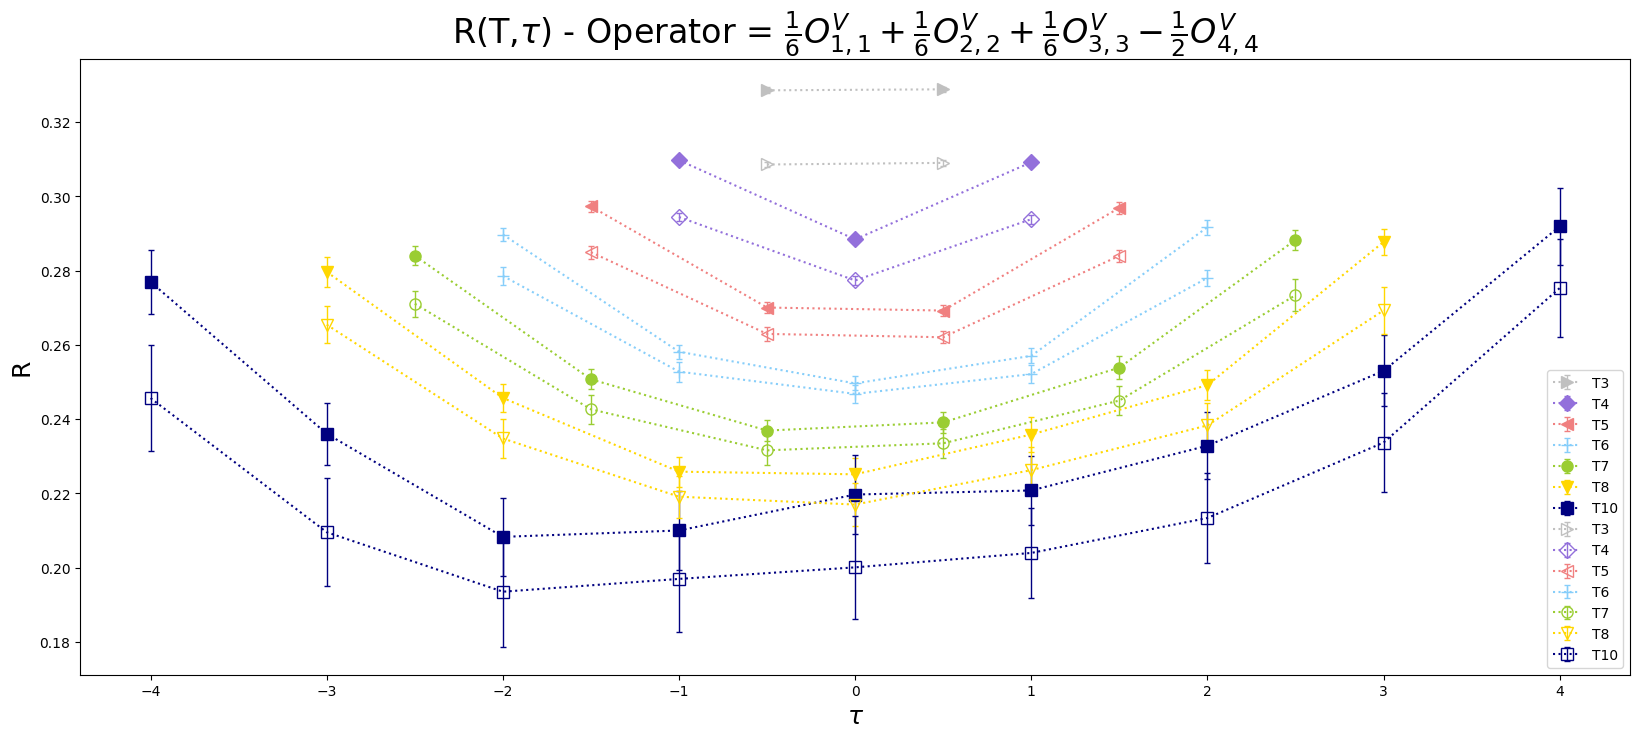

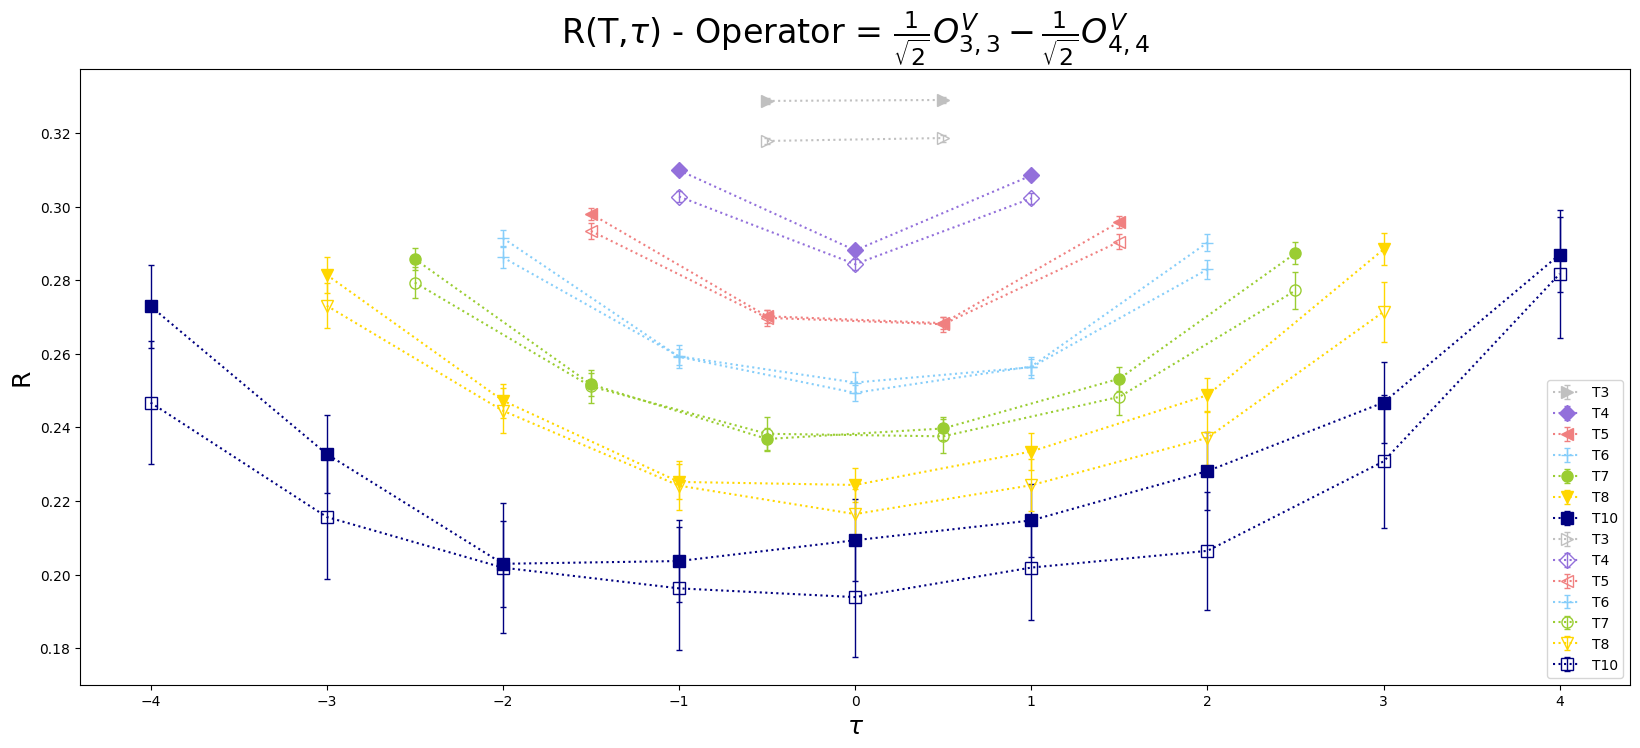

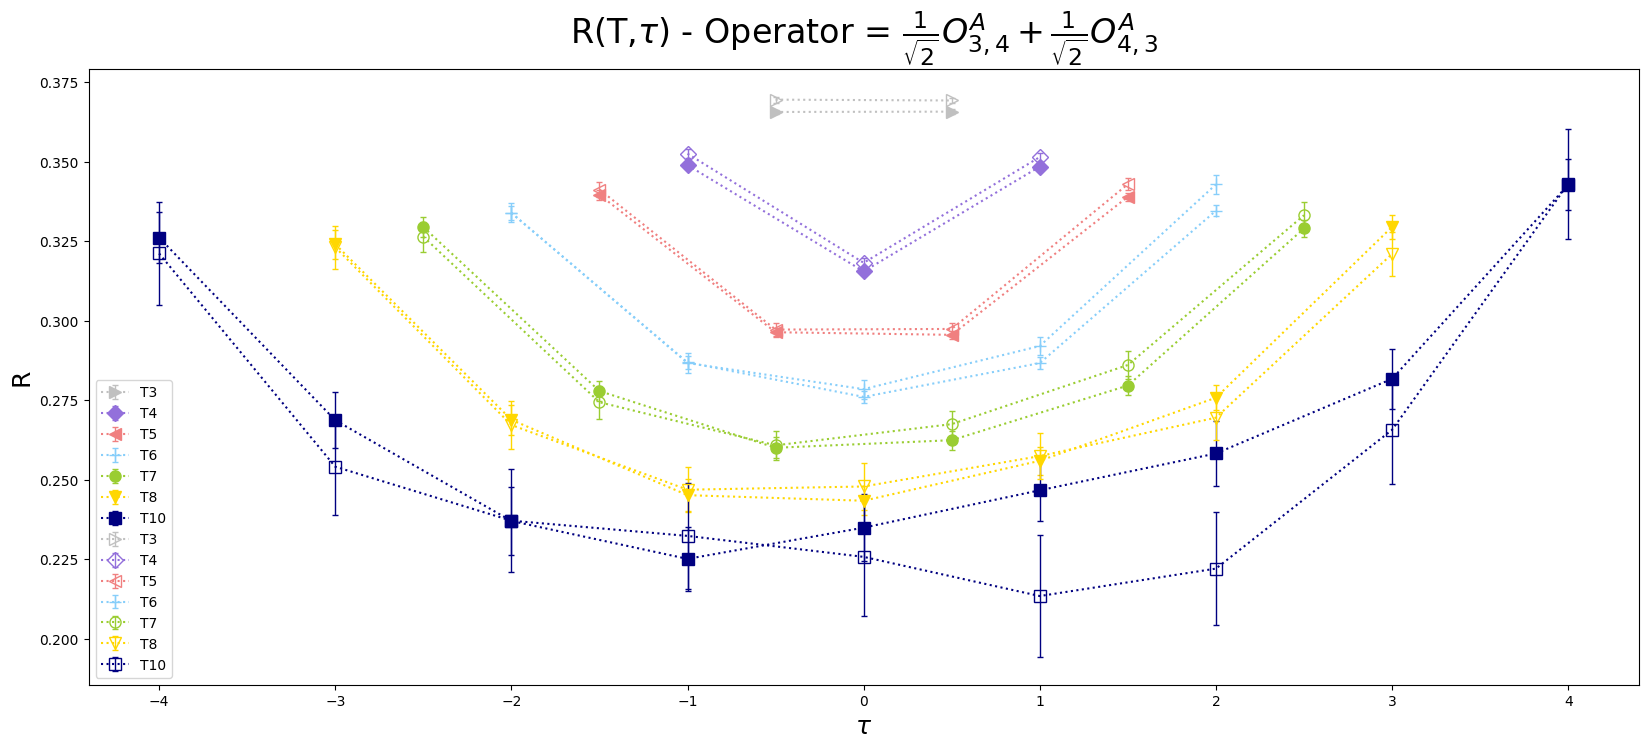

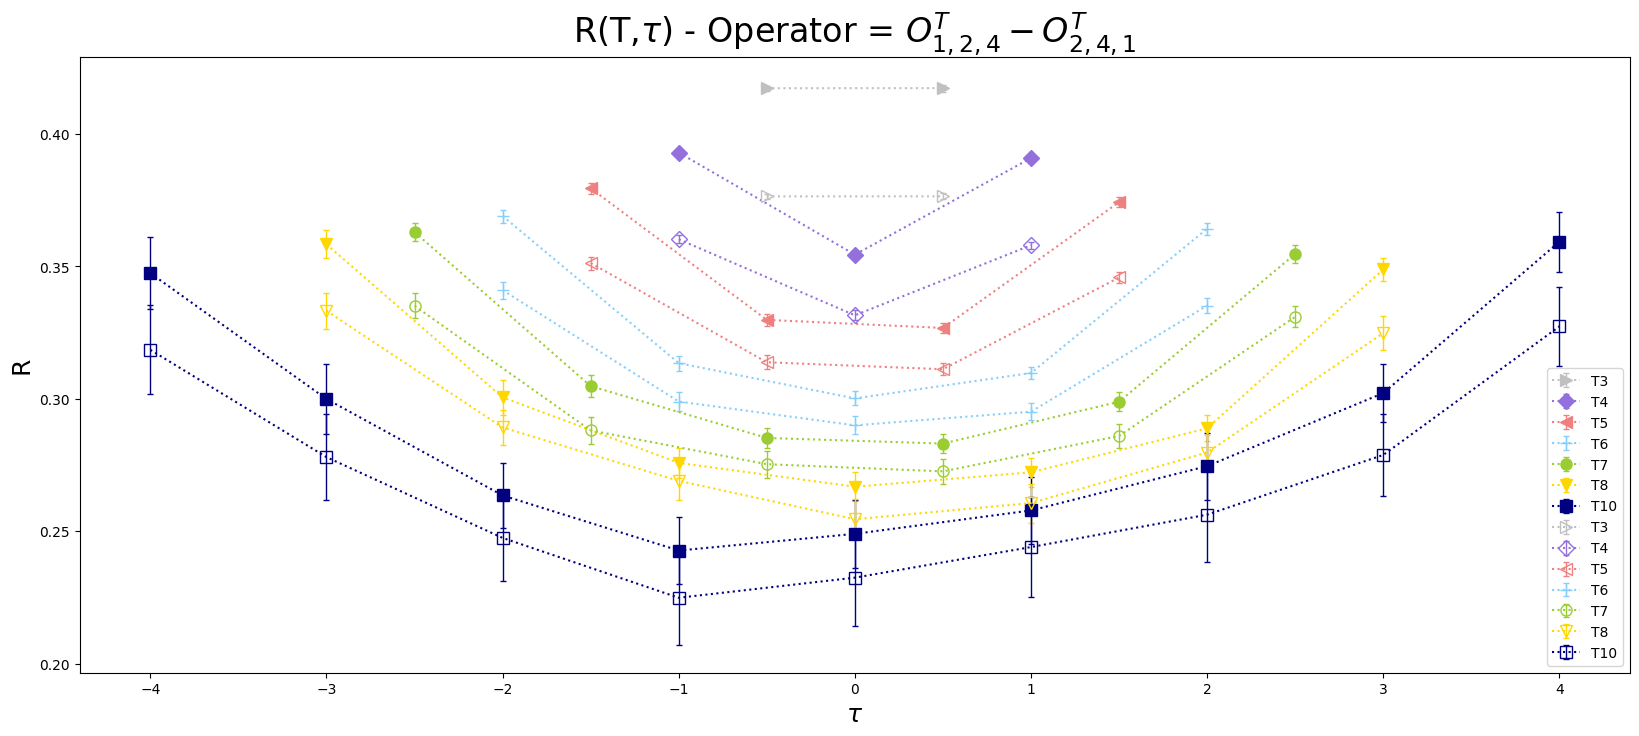

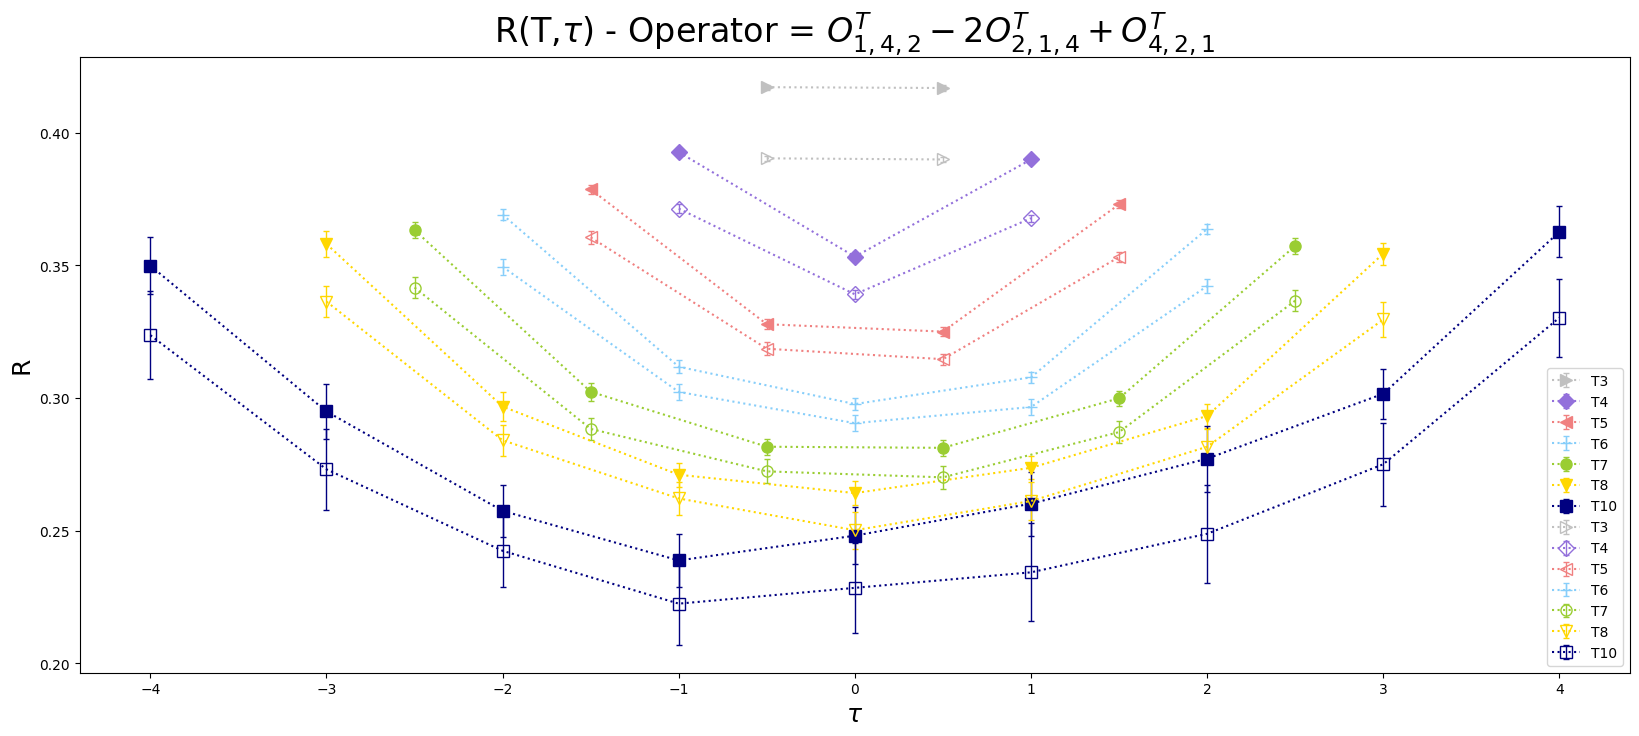

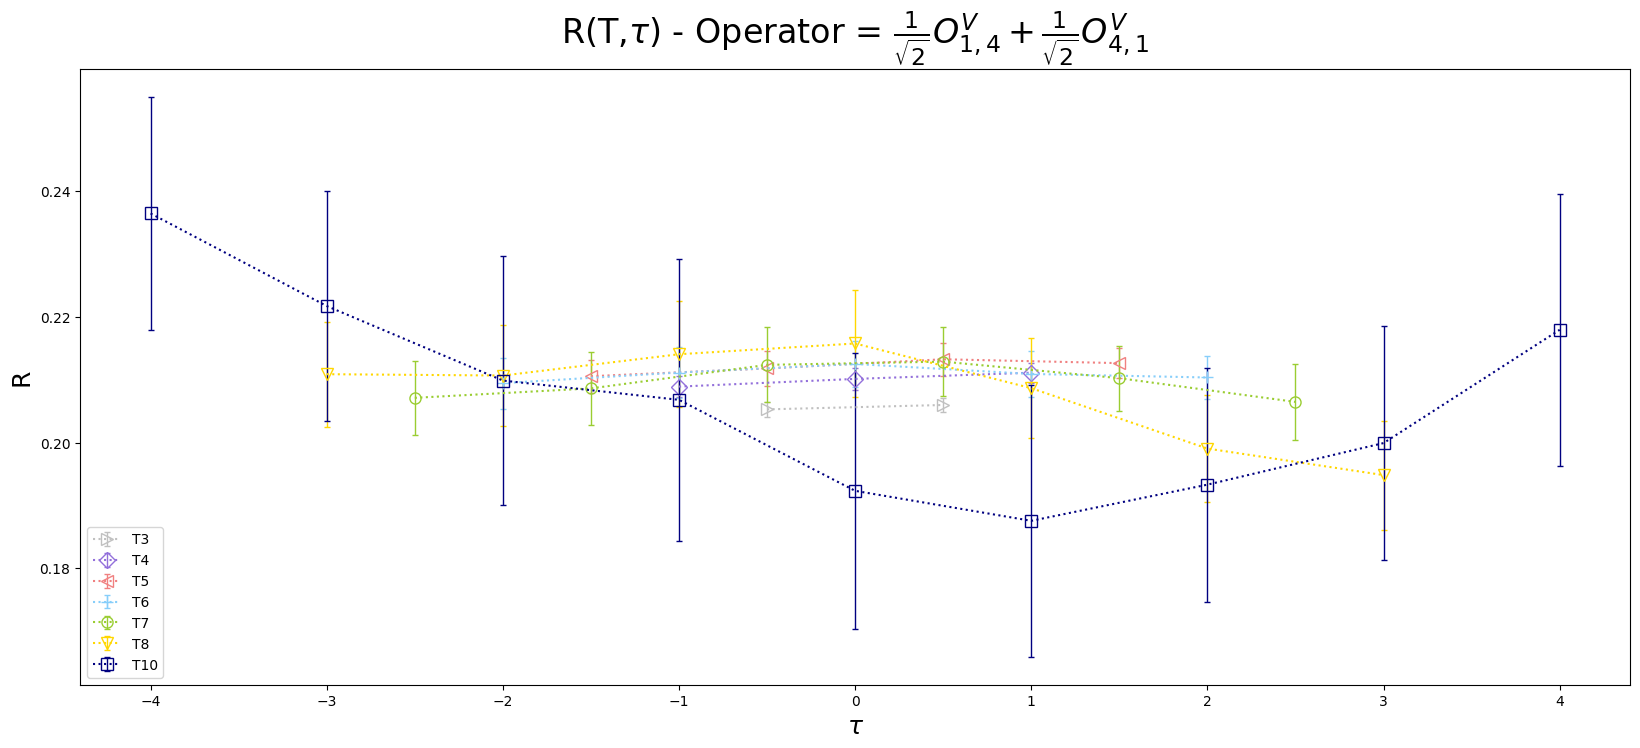

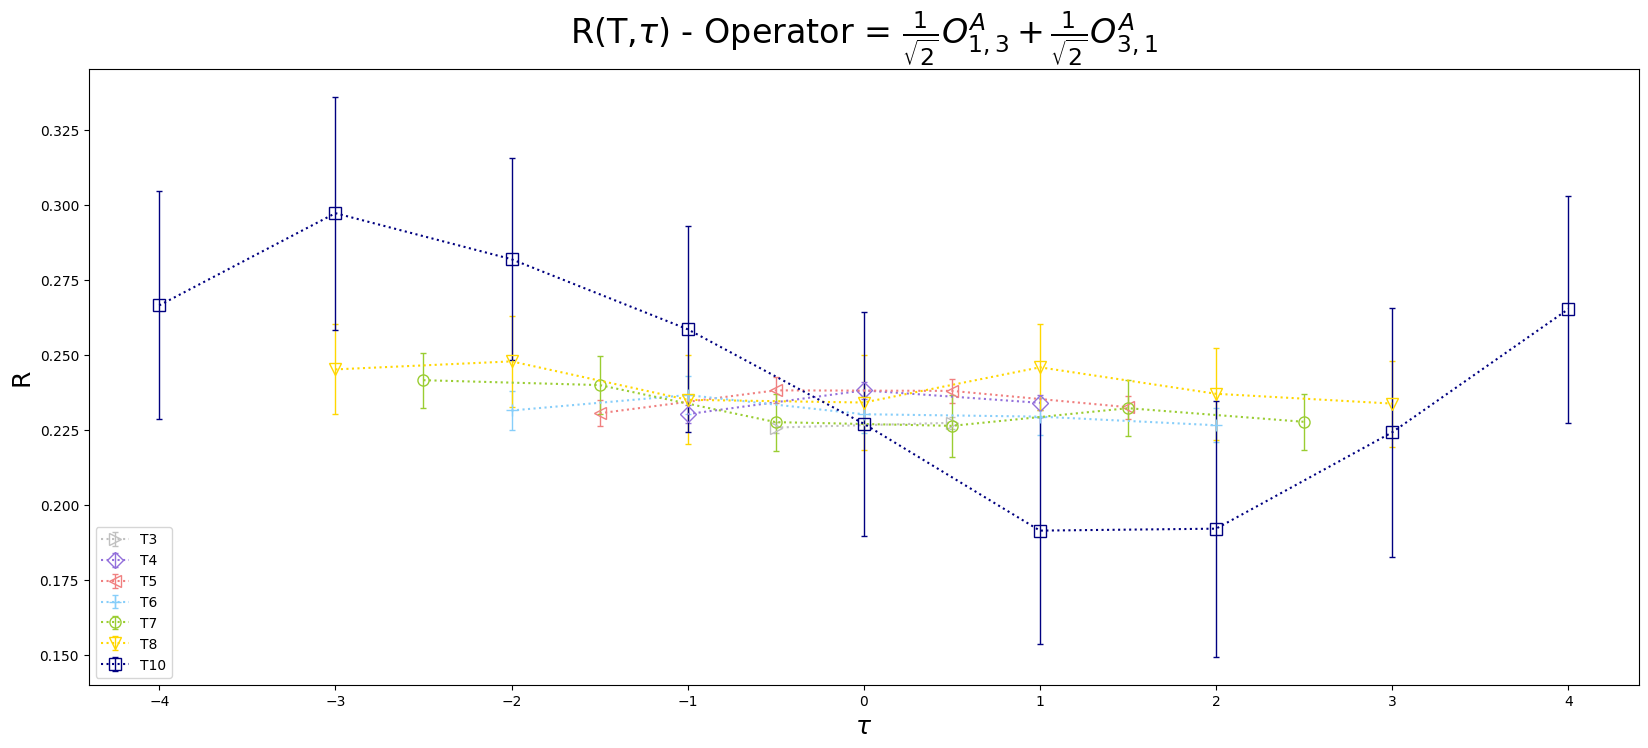

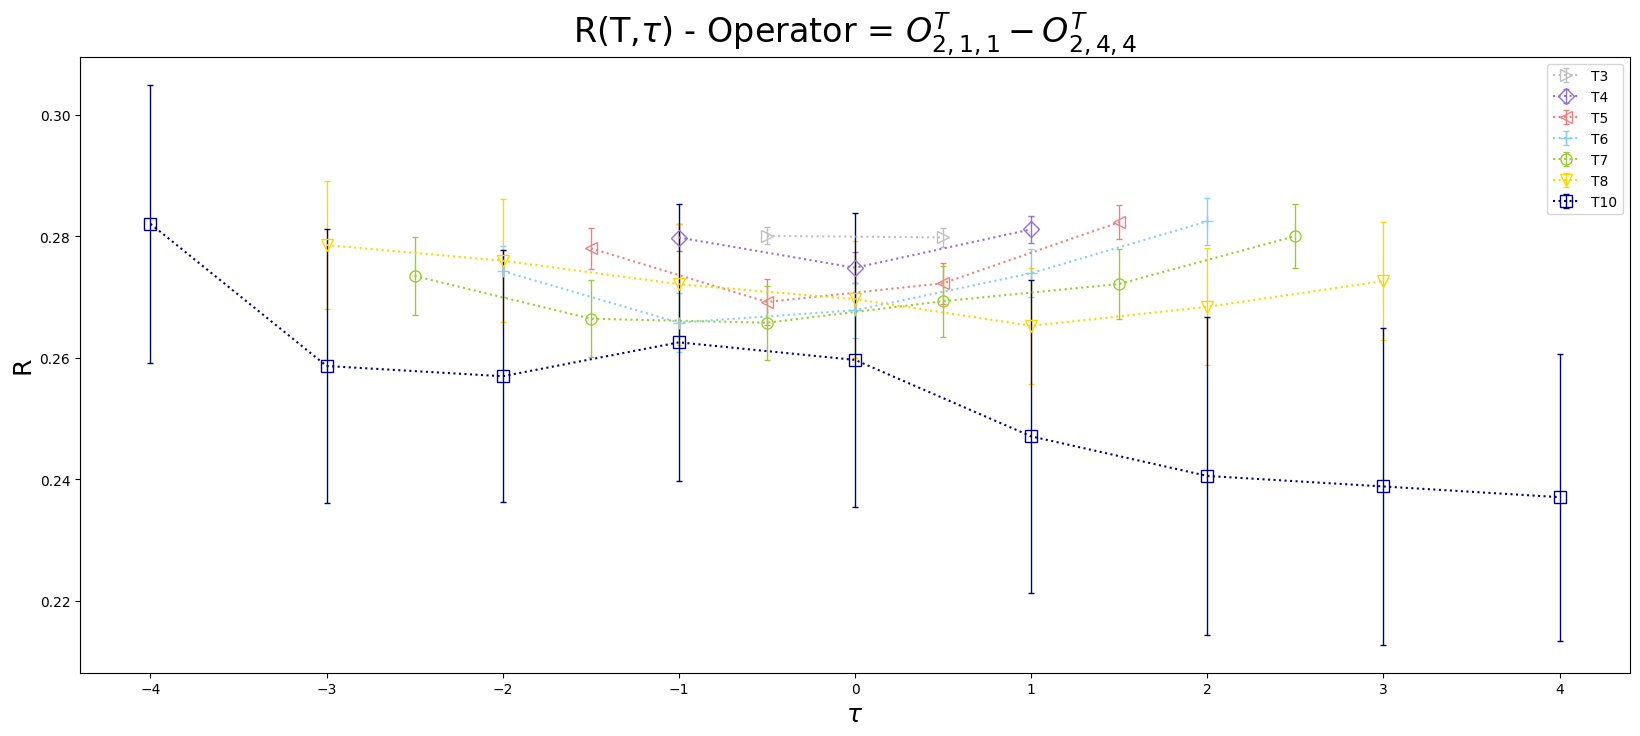

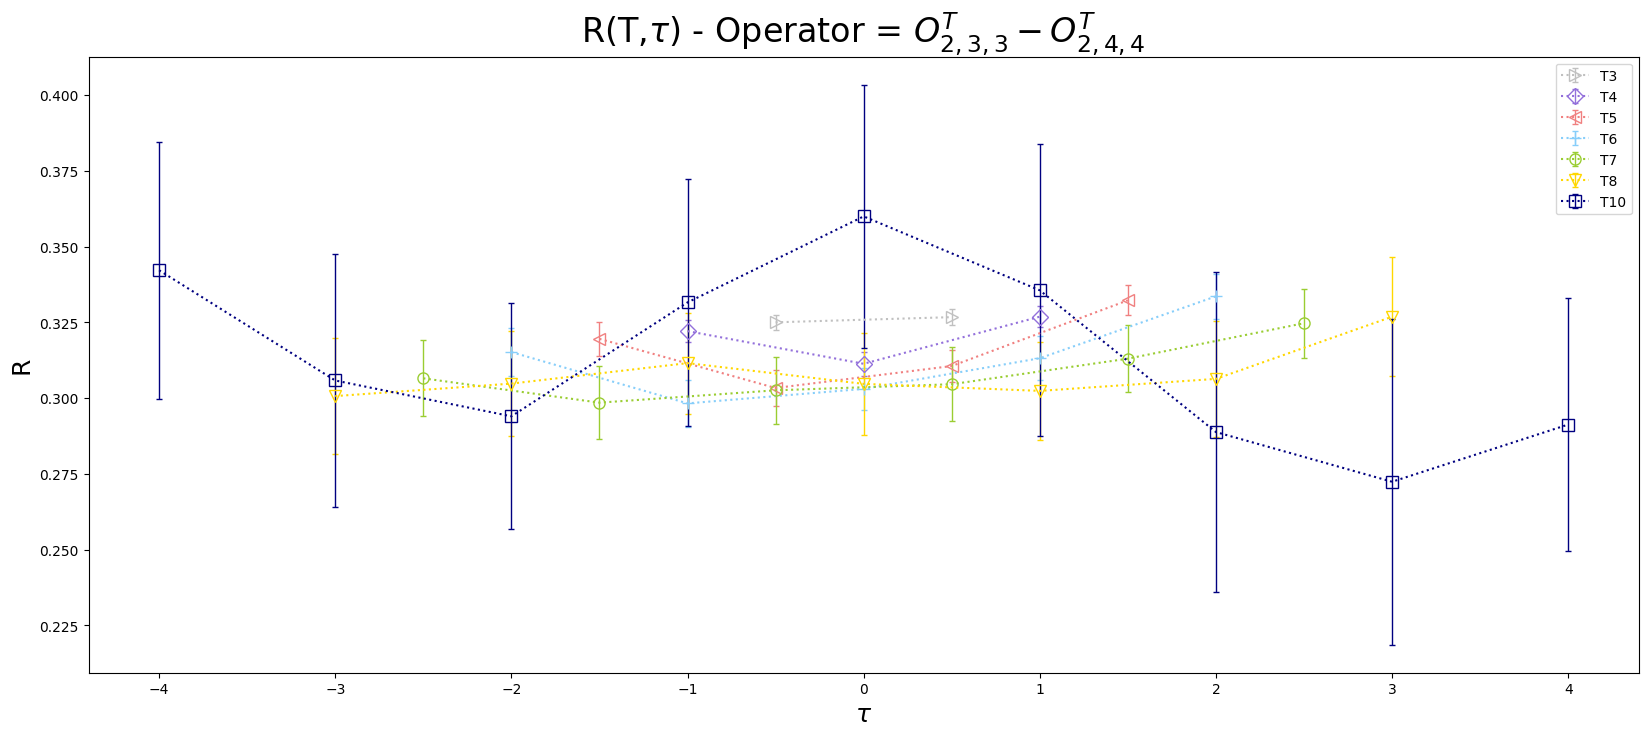

In [4]:
opAnalyzer1.remove_T(12)
opAnalyzer2.remove_T(12)


fig_ax_dict1 = opAnalyzer1.plot_R(show=False, save=False, rescale=True)
_ = opAnalyzer2.plot_R(show=True, save=True, rescale=True, fig_ax_dict=fig_ax_dict1)

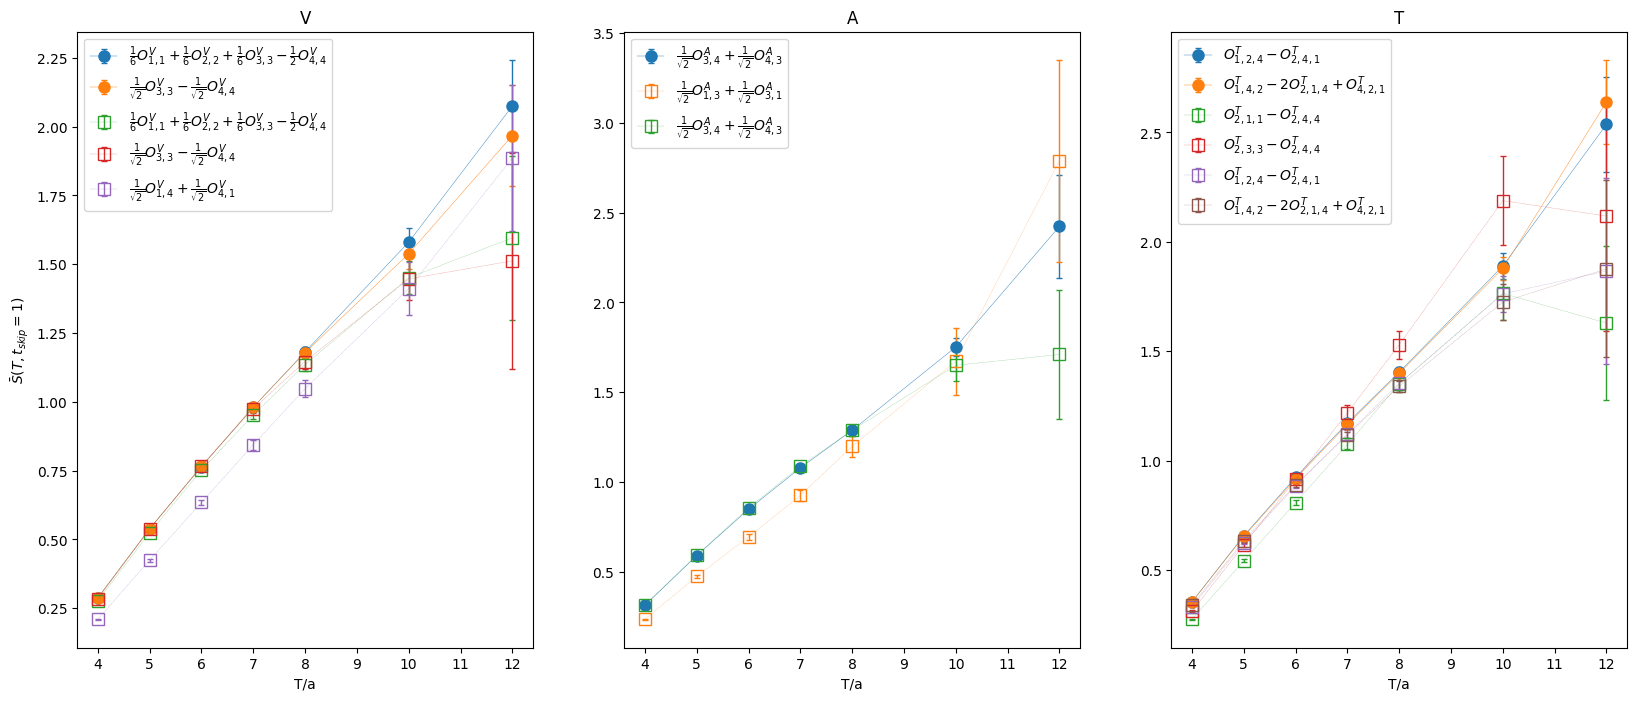

In [5]:
opAnalyzer1.remove_T()
opAnalyzer2.remove_T()

fig_ax_S1 = opAnalyzer1.plot_S(tskip=1, show=False, save=False)
_ = opAnalyzer2.plot_S(tskip=1, show=True, save=True, fig_ax=fig_ax_S1)

# Results

In [6]:
opAnalyzer1.remove_T(12,16)
opAnalyzer2.remove_T(12,16)

In [7]:
result1 = opAnalyzer1.extract_result(verbose=False)
res_dict1 = dict_from_results_list(result1)
moment_final_result(res_dict1)
systematic_final_result(res_dict1)

{('V', 48): 0.1926(58), ('A', 48): 0.216(14), ('T', 48): 0.2337(67)}

{('V', 48): np.float64(0.01581595669777478),
 ('A', 48): np.float64(0.0216385567320441),
 ('T', 48): np.float64(0.0187228711168848)}

In [8]:
result2 = opAnalyzer2.extract_result(verbose=False)
res_dict2 = dict_from_results_list(result2)
moment_final_result(res_dict2)
systematic_final_result(res_dict2)

{('V', 48): 0.175(11), ('A', 48): 0.228(13), ('T', 48): 0.248(10)}

{('V', 48): np.float64(0.025815486221170893),
 ('A', 48): np.float64(0.014271555870656252),
 ('T', 48): np.float64(0.047341617384933136)}

In [9]:
res_dict_total = dict_from_results_list(result1 + result2)
moment_final_result(res_dict_total)
systematic_final_result(res_dict_total)

{('V', 48): 0.1795(85), ('A', 48): 0.221(12), ('T', 48): 0.2450(89)}

{('V', 48): np.float64(0.025300284697938914),
 ('A', 48): np.float64(0.019233050100805664),
 ('T', 48): np.float64(0.0431753009946603)}